In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("property_data.csv")

In [4]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [5]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [6]:
df["ST_NUM"].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [7]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


In [8]:
missing_values = ["--", "na", "n/a"]
df = pd.read_csv("property_data.csv", na_values = missing_values)
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [9]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,True,False,True
8,False,False,False,False,True,False,False


In [10]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [11]:
cnt = 0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED'] = np.nan
    expect ValueError:
        pass
    cnt+=1
    
df.head(9)

SyntaxError: invalid syntax (<ipython-input-11-b4a4cabaa1fc>, line 6)

In [ ]:
df.isnull().sum()

In [ ]:
df['ST_NUM'].filling(125, inplace = True)

In [ ]:
df.loc[3, 'OWN_OCCUPIED'] = 'Y'
df['OWN_OCCUPIED']

In [ ]:
df['NUM_BEDROOMS']

In [ ]:
med_bedroom = df['NUM_BEDROOMS'].median()
med_bedroom

In [ ]:
df['NUM_BEDROOMS'].fillna(med_bedroom, inplace=True)
df.head(10)

In [ ]:
data_obes = pd.ExcelFile("obes.xls")
data_obes.sheet_names

In [ ]:
data_age = data_obes.parse(u'7.2', skiprows = 4, skipfooters = 14)
data_age.head()

In [ ]:
data_age.rename(columns = {u'Unnamed : 0': u'year'}, inplace = True)
data_age.head(10)

In [ ]:
data_age.set_index('Year', inplace = True )
data_age.head(10)

In [ ]:
data_age.plot()

In [ ]:
data_age_no_total = data_age.drop('Total', axis=1)
data_age_no_total.head(10)

In [ ]:
data_age_no_total.plot()

In [ ]:
data_age['Under 16'].plot(label ="Under 16", legend = True)
data_age['35-44'].plot(label = "35-44", legend = True)

In [ ]:
import datetime as datetime

In [ ]:
for i in range (5,50,10):
    print(i)

In [ ]:
dates = pd.date_range(start = '1/01/2020', end = '1/08/2020', freq ='H')
dates

In [ ]:
df = pd.DataFrame(dates, columns = ['date'])
df.head()

In [ ]:
df['datetime'] = pd.to_datetime(df['date'])
df.head()

In [ ]:
df = df.set_index('datetime')
df.drop(['date'], axis = 1, inplace = True)
df.head()

In [ ]:
df['data'] = np.random.randint(0,100, size =(len(dates)))
df.head()

In [ ]:
df[df.index.day == 2]

In [ ]:
df['2020-01-05']

In [ ]:
df.resample('D').mean()

In [ ]:
df['rolling_sum'] = df.rolling(3).sum()
df.head(10)

In [12]:
opsd_daily = pd.read_csv("opsd_germany_daily.csv")
opsd_daily.shape

(4383, 5)

In [13]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [14]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [15]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [16]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [17]:
opsd_daily = pd.read_csv("opsd_germany_daily.csv", index_col = 0,parse_dates = True)
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [18]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [19]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [23]:
opsd_daily.loc['2017-08-10' : '2017-08-16']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2017-08-10,1351.491,100.274,71.160,171.434,2017,8,3
2017-08-11,1329.039,108.577,42.198,150.775,2017,8,4
2017-08-12,1121.458,305.908,80.906,386.814,2017,8,5
2017-08-13,1025.070,101.266,141.157,242.423,2017,8,6
2017-08-14,1305.341,136.416,201.027,337.443,2017,8,0
2017-08-15,1333.398,182.064,172.205,354.269,2017,8,1
2017-08-16,1364.029,68.592,150.677,219.269,2017,8,2


In [24]:
opsd_daily.loc["2012-02"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


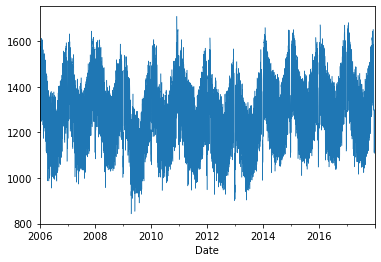

In [26]:
opsd_daily["Consumption"].plot(linewidth=0.5);

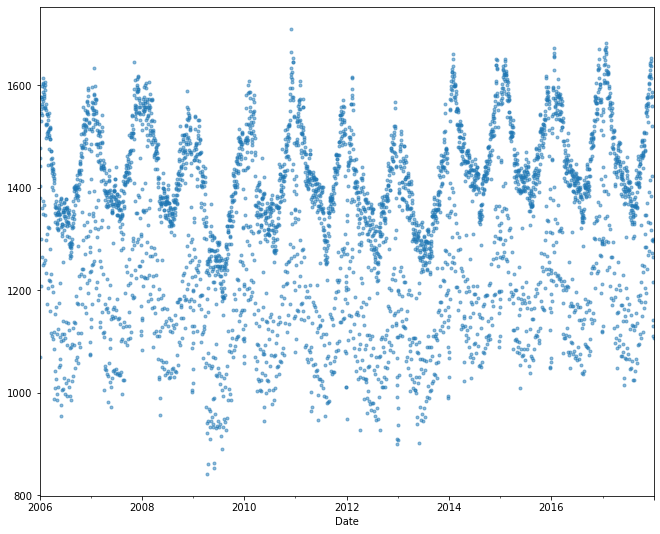

In [28]:
opsd_daily["Consumption"].plot(marker = ".", alpha = 0.5,linestyle = "none", figsize=(11,9));

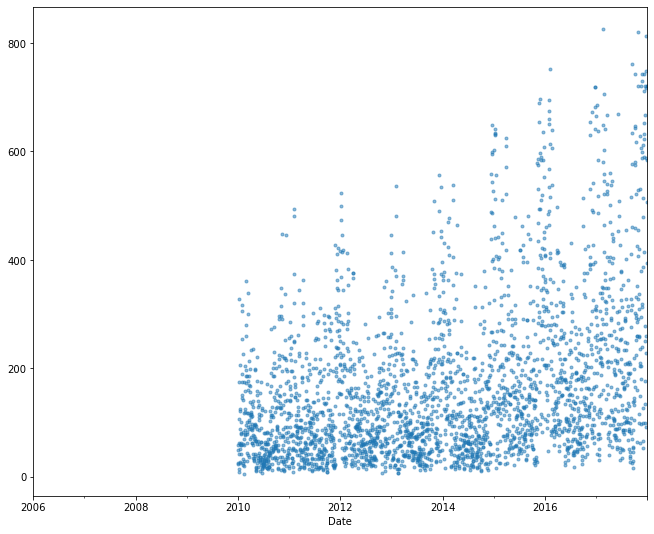

In [29]:
opsd_daily["Wind"].plot(marker = ".", alpha = 0.5,linestyle = "none", figsize=(11,9));

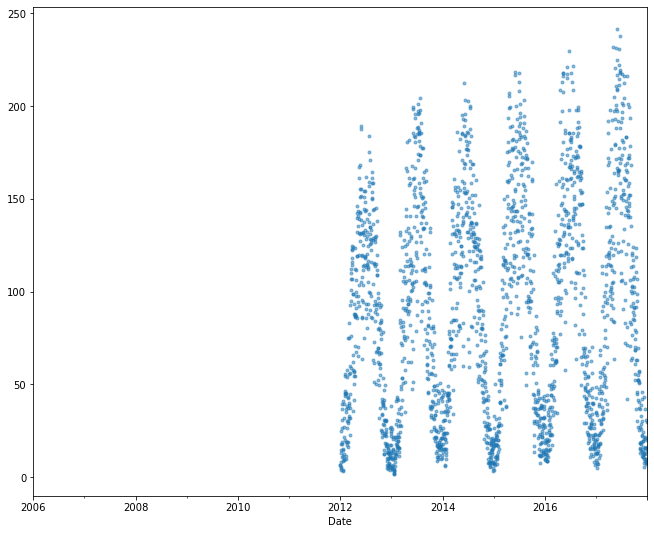

In [30]:
opsd_daily["Solar"].plot(marker = ".", alpha = 0.5,linestyle = "none", figsize=(11,9));

<AxesSubplot:xlabel='Date'>

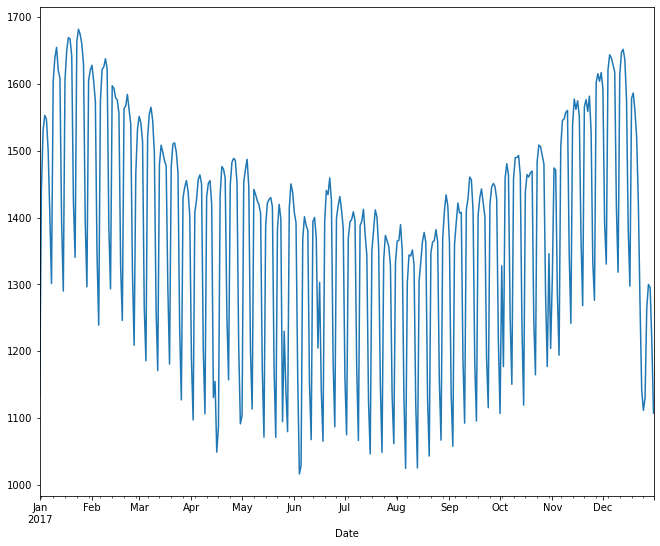

In [32]:
data_2017 = opsd_daily.loc['2017', 'Consumption']
data_2017.plot(figsize =(11,9))

In [33]:
data_2017_janfeb = opsd_daily.loc['2017-01':'2017-02', 'Consumption']
data_2017_janfeb.head()
data_2017_janfeb.tail()

Date
2017-02-24    1539.603
2017-02-25    1319.075
2017-02-26    1208.725
2017-02-27    1467.695
2017-02-28    1532.536
Name: Consumption, dtype: float64

<AxesSubplot:xlabel='Date'>

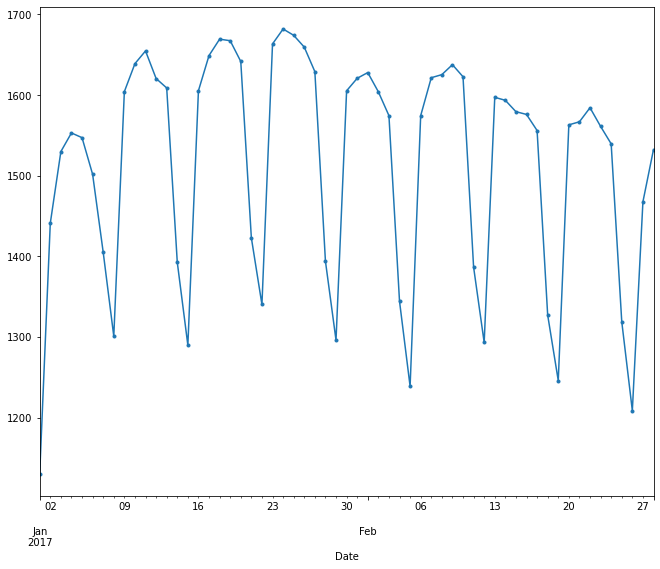

In [37]:
data_2017_janfeb.plot(marker = ".", figsize=(11,9))

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

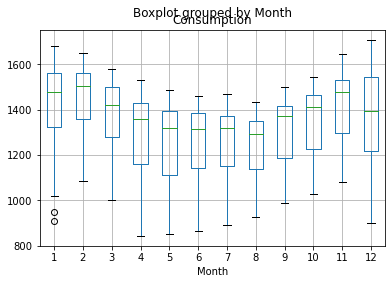

In [40]:
opsd_daily.boxplot(column = ['Consumption'], by = 'Month')

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

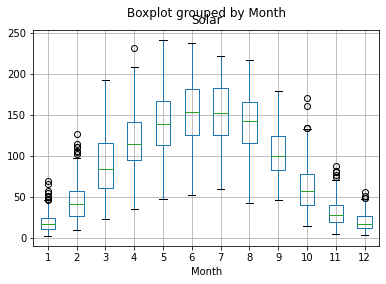

In [41]:
opsd_daily.boxplot(column = ['Solar'], by = 'Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

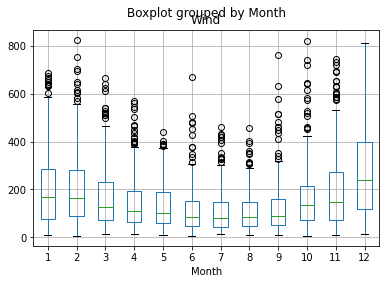

In [42]:
opsd_daily.boxplot(column = ['Wind'], by = 'Month')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

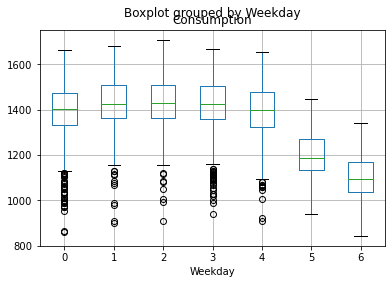

In [43]:
opsd_daily.boxplot(column = ['Consumption'], by = 'Weekday')

In [46]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)
opsd_weekly_mean.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-17,1543.856889,442.531857,18.143714,460.675571
2017-12-24,1440.342401,339.018429,9.895143,348.913571
2017-12-31,1203.265211,604.699143,19.240143,623.939286


<AxesSubplot:xlabel='Date'>

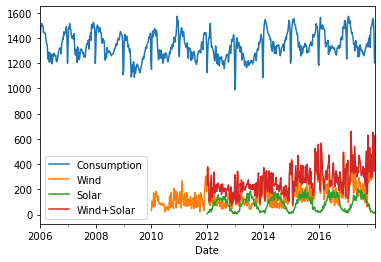

In [47]:
opsd_weekly_mean.plot()

<AxesSubplot:xlabel='Date'>

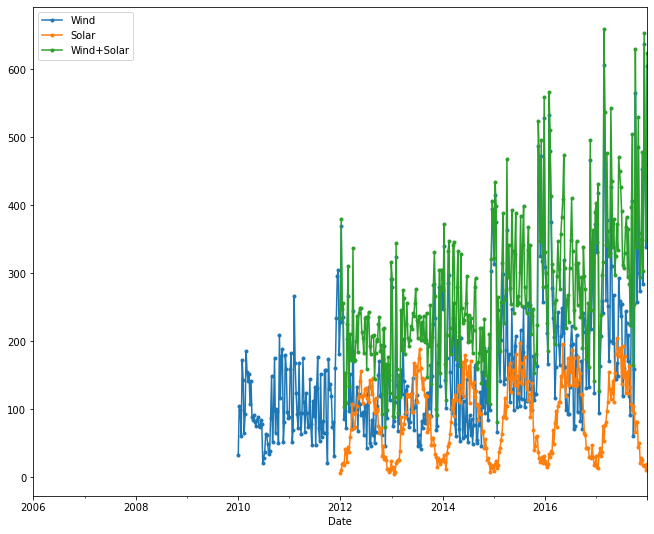

In [49]:
data_columns = ['Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.plot(marker = '.', figsize = (11,9))

<AxesSubplot:xlabel='Date'>

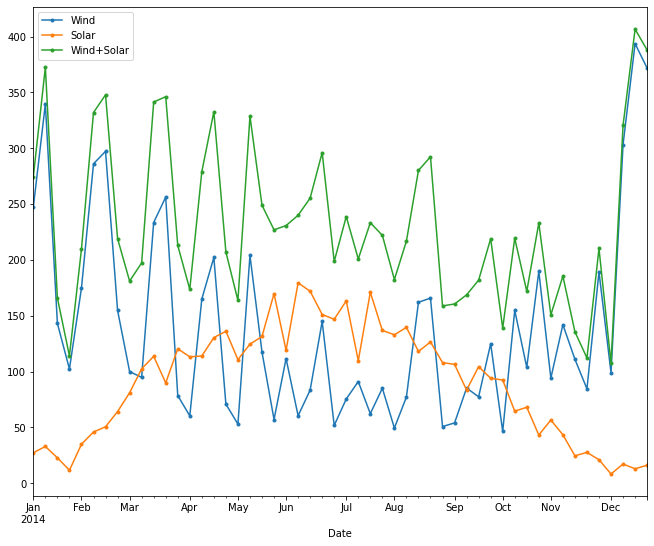

In [50]:
opsd_weekly_mean.loc["2014-01" : "2014-12"].plot(marker = ".", figsize = (11,9))

In [ ]:
#selesai pembelajaran sesi-6